## Integrate and Fire Model - Part 1 
### Group 6: *Maia Barrow, Cianna French, Eden La Kier Sydney Moodie, Wasifa Nasrin, Kelly Stouffer, Vivan Tadakamalla*
 An integrated firing model, or IF for short, is one of the most popular models used in computational neuroscience for modeling and analyzing the behavior of neural systems in response to a stimulus. The IF model is a simplified neuron model and can illustrate how electrical input is accumulated over time. 

Some uses of IF models in research:
1. Population Activity
    * Integrate-and-Fire models can be used to understand spiking behaviors of specific neuronal populations. This can be analyzed to see how populations synchronize firing due to a stimulus. 
2. Neurodegenerative Research 
    * IFM's can be used to study changes in neuron firing as a result of degenerative diseases such as Parkinsons and Alzheimers. 
    * This article talks about modifications made to the integrate-and-fire model to account for metabolic dependencies which are characteristic in certain neurodegenerative disease pathology. https://onlinelibrary.wiley.com/doi/10.1111/ejn.15326 


Matplotlib is building the font cache; this may take a moment.


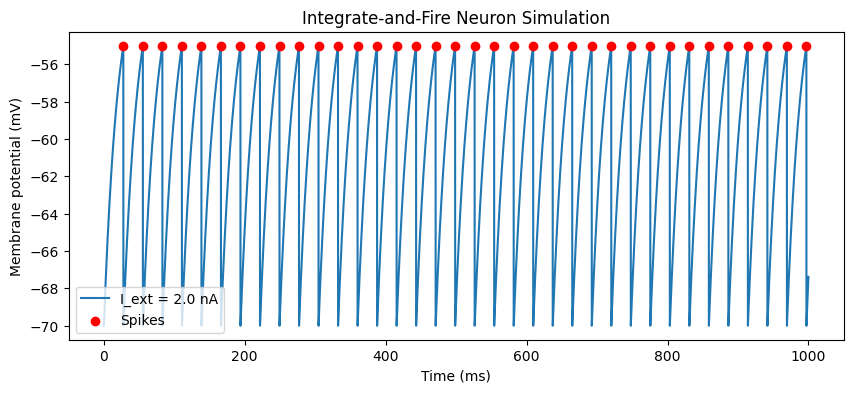

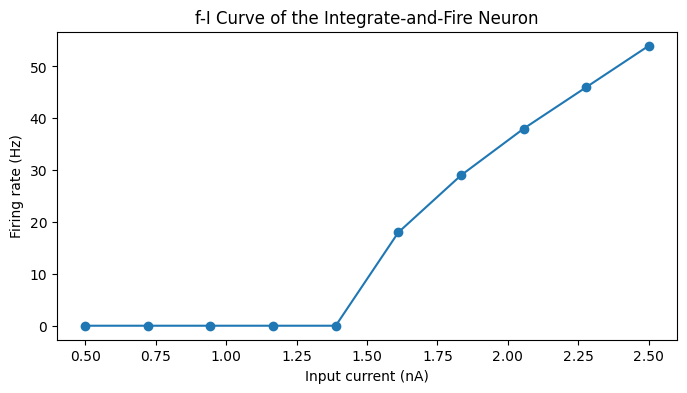

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Simulation parameters
# -------------------------------
T = 1000.0       # Total simulation time in ms
dt = 0.1         # Time step in ms
time = np.arange(0, T + dt, dt)
num_steps = len(time)

# -------------------------------
# Neuron parameters (biologically plausible)
# -------------------------------
V_rest = -70.0       # Resting membrane potential (mV)
V_reset = -70.0      # Reset potential after a spike (mV)
V_threshold = -55.0  # Spike threshold (mV)
tau_m = 20.0         # Membrane time constant (ms)
R = 10.0             # Membrane resistance (MΩ)
# (Note: 1 nA * 10 MΩ = 10 mV depolarization)

def simulate_IF_neuron(I_ext):
    """
    Simulate a simple integrate-and-fire neuron with a constant input current I_ext (in nA).

    Parameters:
        I_ext (float): External input current in nA.
    
    Returns:
        V (ndarray): Membrane potential trace over time.
        spike_times (list): Times (in ms) when spikes occurred.
    """
    V = np.zeros(num_steps)
    V[0] = V_rest
    spike_times = []

    for i in range(1, num_steps):
        # Euler method to update the membrane potential
        dV = dt / tau_m * (-(V[i-1] - V_rest) + R * I_ext)
        V[i] = V[i-1] + dV

        # Check if the threshold is crossed
        if V[i] >= V_threshold:
            spike_times.append(time[i])
            V[i] = V_reset  # Reset the potential after a spike

    return V, spike_times

# -------------------------------
# Part 1: Visualize a single simulation
# -------------------------------
I_example = 2.0  # Input current in nA (choose a value above threshold)
V_example, spikes_example = simulate_IF_neuron(I_example)

plt.figure(figsize=(10, 4))
plt.plot(time, V_example, label=f'I_ext = {I_example} nA')
# Mark spike times on the trace
plt.scatter(spikes_example, [V_threshold]*len(spikes_example), color='red', zorder=5, label='Spikes')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Integrate-and-Fire Neuron Simulation')
plt.legend()
plt.show()

# -------------------------------
# Part 2: Analyze firing rate vs. input current (f-I curve)
# -------------------------------
I_values = np.linspace(0.5, 2.5, 10)  # Define input currents from 0.5 nA to 2.5 nA
firing_rates = []

for I_ext in I_values:
    V, spike_times = simulate_IF_neuron(I_ext)
    num_spikes = len(spike_times)
    # Firing rate in Hz: spikes per second (T is in ms)
    firing_rate = num_spikes / (T / 1000.0)
    firing_rates.append(firing_rate)

plt.figure(figsize=(8, 4))
plt.plot(I_values, firing_rates, marker='o')
plt.xlabel('Input current (nA)')
plt.ylabel('Firing rate (Hz)')
plt.title('f-I Curve of the Integrate-and-Fire Neuron')
plt.show()


**Looking at the above visualization/based on what you know regarding the LIF model--what aspect of this model is most unlike a real biological neuron? What is missing? Additionally what aspects are like a biological neuron? Compare and Contrast the two.**

Similarities | Differences
------------ | -------------
The LIF and biological neuron both have leaky channels, showing a loss of current. | The biological neuron also loses current in other ways, such as constantly through the chemical synapse, at the gap junction of electrical synapses, or when neurotransmitters don't bind to receptors. On the other hand, the LIF doesn't show that. 
The LIF and biological neuron show that threshold should be crossed before an action potential can be made. | However, spike generation is not detailed in the LIF model, thus excluding voltage-gated ion channels. The biological neuron demonstrates this though. 
With more current typically comes faster voltage because more ions are following through the neuron/circuit. | Because the biological neuron's refractory periods are based on the inactivation and closing of voltage-gated sodium channels, this is harder to represent in the LIF model. 
Similar to the process of summation within biological neurons, the LIF model has a similar feature that integrates IPSPs and EPSPs over a set amount of time to produce a gicen output | The LIF model is not complex enough to replicate the spatial structure of the neuron, oversimplifying it as a single pouint rather than multiple parts like the soma, axon, and dendrites. There may be issues with accuracy due to the lack of spatially dependent integration.
The LIF model and biological model both incorperate the use of temporal coding and summation, relying on this synchronization feature to time when the action potential fires | The LIF model has no way of representing the biological process of synaptic plasticity or learned behavior, which would theoretically result in increased efficency.
The LIF model stimulates temporal summation of inputs, which is when signals accumulate over a period of time to potentially conduct an action potential, akin to a biological neuron | Biological neurons are influenced by noise and random synaptic inputs, which leads to irregular responses. However, in the LIF model, because it often has predictible behavior, it would not be realistic in this sense.
Both LIF model and biological neruons have resting potentials that requires energy to be sustained. In a biological neuron, it is maintained via ion pumps whereas in the LIF model, it is shown as a constant rmp. | The LIF model does not account for the different ion pumps and simplifies it to a single leakage term.

**What was the most challenging aspect of this homework?**
Coming up with the comparisons and contrasts! In addition, getting used to Jupyter and GitHub took a little bit of time!

**Estimate how long it took you to complete this homework.**It took 3-4 hours collectivley between the work contributed by all groupmates. This was largely due to diffuculties with nativating the platform.



## Leaky Integrate and Fire Model - Part 2 
### 
 The LIF model illustrates the loss of current through leaky channels, thus promoting more accuracy between electrical and biological representations of neurons. However, while the LIF model identifies signal integration to reach threshold, it does not show spike generation with voltage-gated channels at all, reducing its biological accuracy. On the other hand, the HH model shows signal integration (with graded potentials reaching threshold to create action potentials AND a loss of current through leaky channels) AND spike generation with voltage-gated channels. However, the HH model uniformly treats all ions and all parts of the neuron, like the dendrites and the synapse, the same when different ions perform different functions and spatial summation makes integration more complicated.

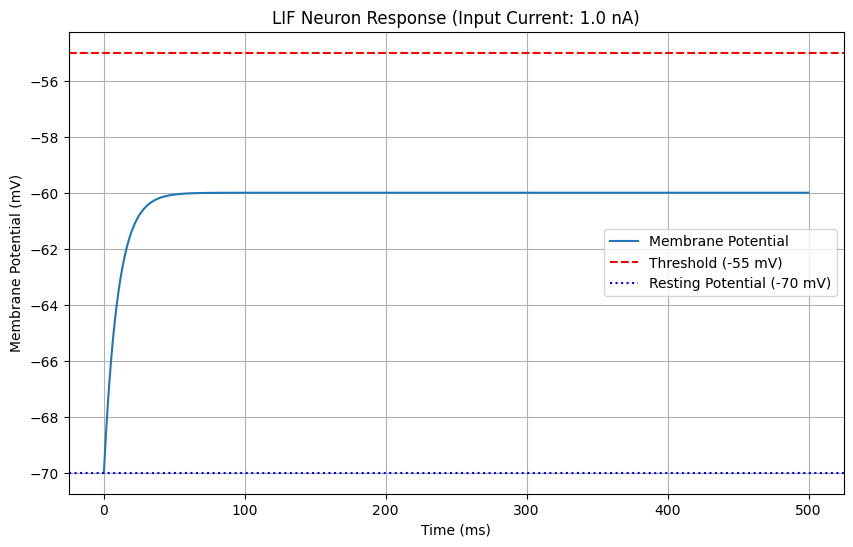

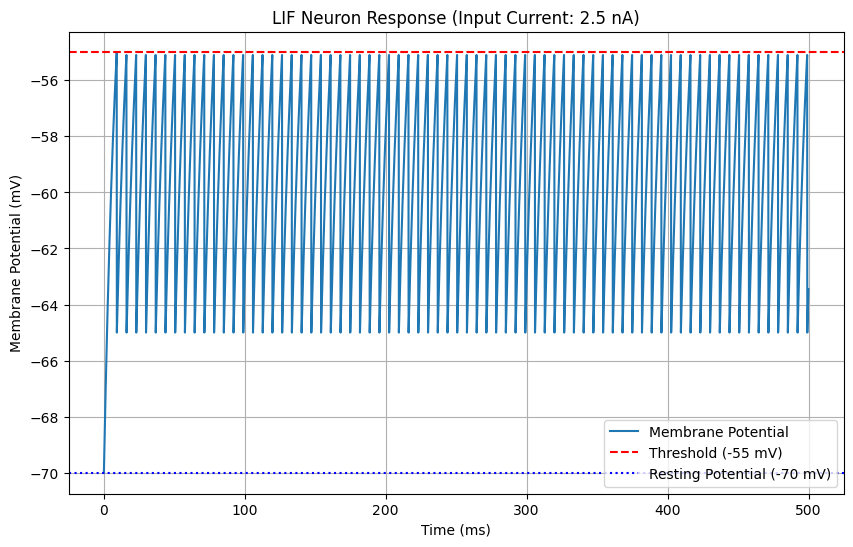

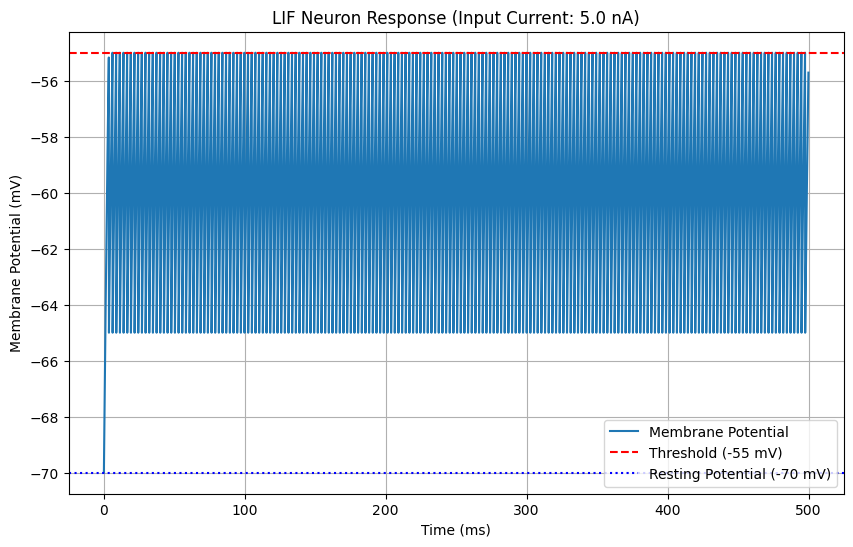

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# LIF model parameters
resting_potential = -70.0  # Resting potential in mV
threshold = -55.0          # Threshold potential in mV
reset_potential = -65.0    # Reset potential after a spike in mV
membrane_resistance = 10.0 # Membrane resistance in MOhm
membrane_time_constant = 10.0  # Membrane time constant in ms

def lif_model(input_current, dt=0.1, simulation_time=500):
    """
    Simulates a leaky integrate-and-fire neuron.

    Parameters:
        input_current (array): Input current in nA (one value per time step).
        dt (float): Time step for simulation in ms.
        simulation_time (float): Total simulation time in ms.

    Returns:
        time (array): Array of time points.
        membrane_potential (array): Membrane potential over time.
        spikes (list): Indices of spike times.
    """
    num_steps = int(simulation_time / dt)
    time = np.arange(0, simulation_time, dt)
    membrane_potential = np.full(num_steps, resting_potential)
    spikes = []

    for t in range(1, num_steps):
        # Update membrane potential based on LIF equation
        dv = (
            (-membrane_potential[t-1] + resting_potential + \
             membrane_resistance * input_current[t]) \
            / membrane_time_constant
        ) * dt
        membrane_potential[t] = membrane_potential[t-1] + dv

        # Check for spike
        if membrane_potential[t] >= threshold:
            membrane_potential[t] = reset_potential
            spikes.append(t * dt)  # Record spike time

    return time, membrane_potential, spikes

# Simulation parameters
simulation_time = 500  # ms
dt = 0.1  # Time step in ms

def run_simulation_and_plot(input_current_amplitude):
    # Generate input current (constant input)
    input_current = np.full(int(simulation_time / dt), input_current_amplitude)

    # Simulate LIF model
    time, membrane_potential, spikes = lif_model(input_current, dt, simulation_time)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(time, membrane_potential, label="Membrane Potential")
    plt.axhline(threshold, color="r", linestyle="--", label="Threshold (-55 mV)")
    plt.axhline(resting_potential, color="b", linestyle=":", label="Resting Potential (-70 mV)")
    plt.xlabel("Time (ms)")
    plt.ylabel("Membrane Potential (mV)")
    plt.title(f"LIF Neuron Response (Input Current: {input_current_amplitude} nA)")
    plt.legend()
    plt.grid()
    plt.show()

# Run simulations with different input currents
input_currents = [1.0, 2.5, 5.0]  # Input currents in nA
for input_current in input_currents:
    run_simulation_and_plot(input_current)

**What changes had to be made to update the model and why?** Initially, a LIF model was made in Part 1. During this stage, we went back and created an IF model in place of the LIF model but reused the previously made LIF model.

**How did you and/or ChatGPT implement the changes?** This time, we specifically asked ChatGPT to make an IF model with biologically relevant values. The output code was then used for Part 1 of this assignment.

**Define 'bits' and Shannon's entropy with relation to information theory. Which model contains the most bits? Which model has the highest Shannon's entropy?** Bits are the smallest unit of information, and they can be represented as the number of binary questions it takes to reduce the uncertainty (or information) to 0. Shannon’s entropy describes the amount of uncertainty contained in the problem, and the higher this is, the more uncertainty there is and the more bits are needed, while the lower this is, the less uncertainty there is and the less bits are needed to decode the information in the first place. Both connect to the information theory because information is considered uncertainty, which means more bits = more information = more entropy.
Due to having a higher complexity and less efficiency to make, the LIF model has higher entropy than the IF model.

**In another set of Markdown code reflect on your ability to work collaboratively using Git-Hub. For instance, did you encounter any problems? How did you overcome them? Or are you still unable to make it work?** For this section of the project, our group decided to work collaboratively on the assignment by writing the code and responses to the Markdown questions in a shared Google Doc to make it easier than in the first part of this project. During Part II, we gained experience utilizing the merge feature on GitHub to combine coding files; however, we were challenged by formatting issues with our cells when using this feature. We overcame this by individually uploading our files to the shared repository and downloading the most recently updated version and writing over the last person’s code to add our own contributions, but we found that the navigation of GitHub added around 2 hours to the last submission.

# Integrate & Fire Model + LIF Model - Part 3

Matplotlib is building the font cache; this may take a moment.


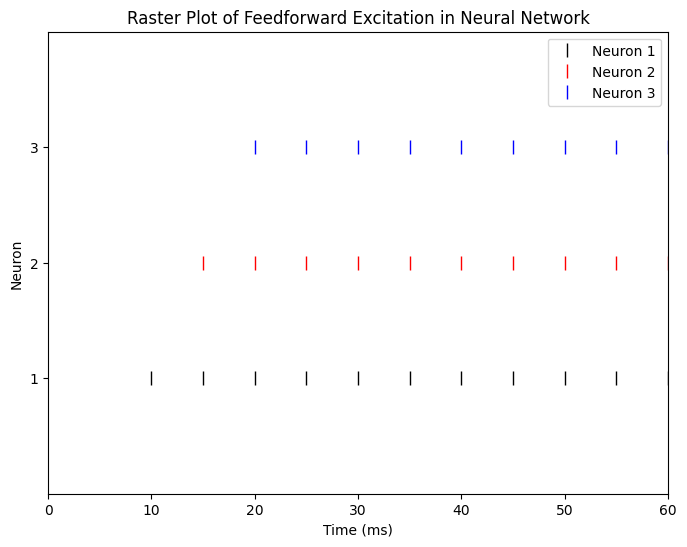

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define firing times for each neuron
# Neuron 1 fires at times: 0 ms, 10 ms, 20 ms, ...
neuron_1_firing = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])  
# Neuron 2 fires 5 ms after each neuron in Neuron 1
neuron_2_firing = neuron_1_firing + 5  
# Neuron 3 fires 5 ms after each neuron in Neuron 2
neuron_3_firing = neuron_2_firing + 5

# Create the figure and axis
plt.figure(figsize=(8, 6))

# Plot the raster plot for each neuron
plt.plot(neuron_1_firing, np.ones_like(neuron_1_firing), 'k|', label="Neuron 1", markersize=10)
plt.plot(neuron_2_firing, np.ones_like(neuron_2_firing) * 2, 'r|', label="Neuron 2", markersize=10)
plt.plot(neuron_3_firing, np.ones_like(neuron_3_firing) * 3, 'b|', label="Neuron 3", markersize=10)

# Set plot limits
plt.xlim(0, 60)  # Time range from 0 to 60 ms
plt.ylim(0, 4)   # 3 neurons, so the y-axis goes from 0 to 4 (including the space between neurons)

# Set the y-ticks to only show whole numbers
plt.yticks([1, 2, 3])  # Only show 1, 2, and 3 on the y-axis

# Add labels and title
plt.xlabel("Time (ms)")
plt.ylabel("Neuron")  # Changed "Layer" to "Neuron"
plt.title("Raster Plot of Feedforward Excitation in Neural Network")

# Show legend
plt.legend()

# Display the plot
plt.show()

A simple open-loop neural network processes inputs in a feedforward way without feedback or recurrent connectivity. It takes in inputs, then feeds them to a controller that makes instructions for operating an actuator in response to the input. The controller sends information to the actuator which takes action to reach a desired state. In short, the controller tells the actuator what to do, and the actuator carries out the action. A simple open-loop neural network produces rapid and accurate responses. However, a limitation is that it may not work for novel situations. A simple open loop neural network is different from an IF and LIF neuron because it uses continuous signals and has a fixed structure. An NN has an input layer, one or more hidden layers, and an output layer while IF and LIF models do not. Overall, open-loop feedforward neural networks are the most complex and have more opportunities for processing and would contain more bits to encode. The LIF model is more complex than the IF model because it is more biologically accurate and includes leak channels, so the LIF model would have more bits than the IF model.

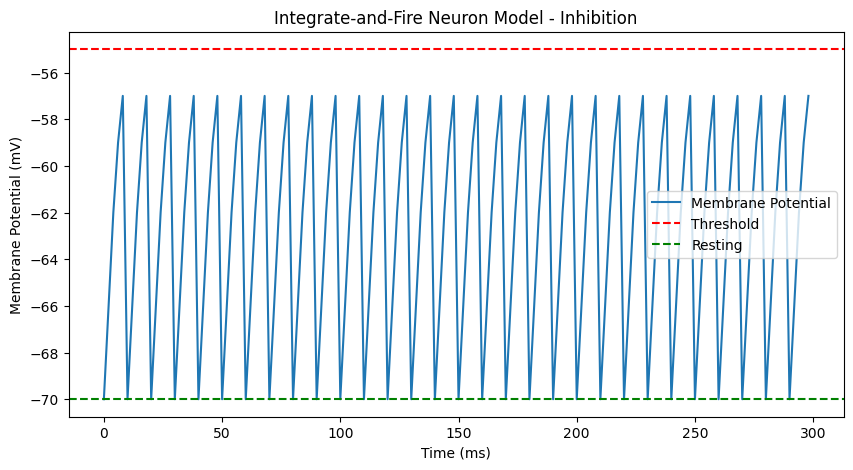

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 2  # Time step (ms)
T = 300   # Total simulation time (ms)
time = np.arange(0, T, dt)

# Neuron parameters
V_rest = -70  # Resting potential (mV)
V_th = -55    # Spiking threshold (mV)
V_reset = -70 # Reset potential (mV)
R = 10        # Membrane resistance (MΩ)
C = 1         # Membrane capacitance (µF)
tau = R * C   # Membrane time constant (ms)
I = 2.0       # Constant input current (nA)

# Initialize variables
V = np.full_like(time, V_rest)  # Membrane potential
spikes = []

# Simulate the IF neuron model
for i in range(1, len(time)):
    dV = (-(V[i-1] - V_rest) + R * I) / tau * dt  # Update rule
    V[i] = V[i-1] + dV
    
    if V[i] >= V_th:
        V[i] = V_reset  # Reset after spike
        spikes.append(time[i])

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, V, label="Membrane Potential")
plt.axhline(V_th, color='red', linestyle='--', label="Threshold")
plt.axhline(V_rest, color='green', linestyle='--', label="Resting")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Integrate-and-Fire Neuron Model - Inhibition")
plt.legend()
plt.show()

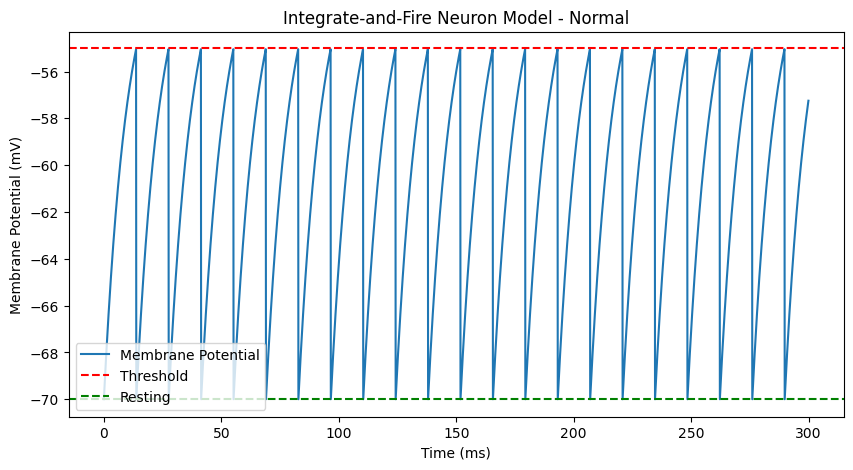

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # Time step (ms)
T = 300   # Total simulation time (ms)
time = np.arange(0, T, dt)

# Neuron parameters
V_rest = -70  # Resting potential (mV)
V_th = -55    # Spiking threshold (mV)
V_reset = -70 # Reset potential (mV)
R = 10        # Membrane resistance (MΩ)
C = 1         # Membrane capacitance (µF)
tau = R * C   # Membrane time constant (ms)
I = 2.0       # Constant input current (nA)

# Initialize variables
V = np.full_like(time, V_rest)  # Membrane potential
spikes = []

# Simulate the IF neuron model
for i in range(1, len(time)):
    dV = (-(V[i-1] - V_rest) + R * I) / tau * dt  # Update rule
    V[i] = V[i-1] + dV
    
    if V[i] >= V_th:
        V[i] = V_reset  # Reset after spike
        spikes.append(time[i])

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, V, label="Membrane Potential")
plt.axhline(V_th, color='red', linestyle='--', label="Threshold")
plt.axhline(V_rest, color='green', linestyle='--', label="Resting")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Integrate-and-Fire Neuron Model - Normal")
plt.legend()
plt.show()

To change the inputs to show inhibition, the code was updated to include an inhibition input that prevented the spikes from reaching threshold. I made sure that the spikes would occur, but they would never reach -55 mV. Specifically in the code, I changed the time step (dt) from 0.1 to 2 ms. This resulted in spikes that were sub-threshold, which would mean that no action potential was fired. This was shown on a graph showing IF model firing.

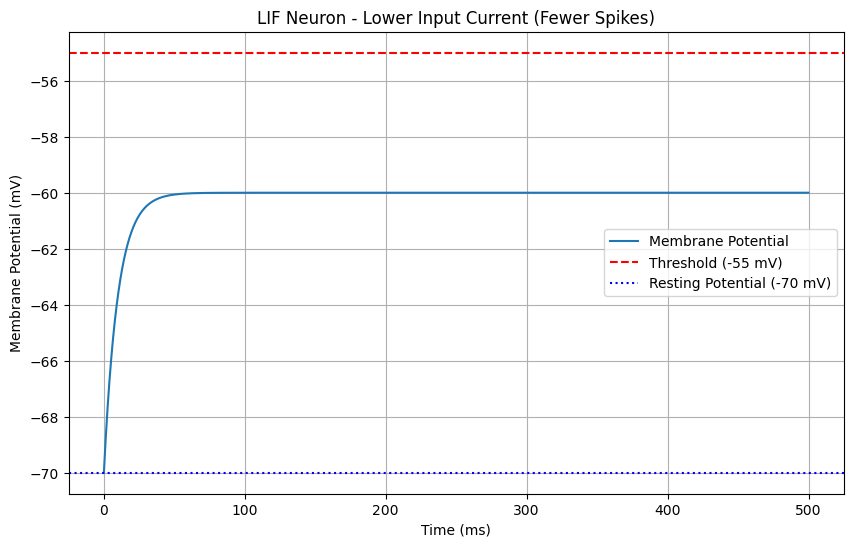

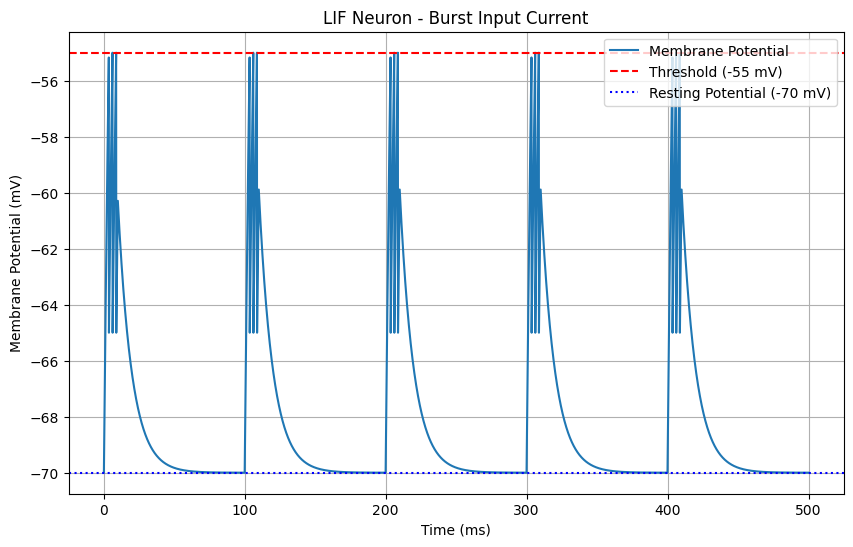

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# LIF model parameters
resting_potential = -70.0  # Resting potential in mV
threshold = -55.0  # Threshold potential in mV
reset_potential = -65.0  # Reset potential after a spike in mV
membrane_resistance = 10.0  # Membrane resistance in MOhm
membrane_time_constant = 10.0  # Membrane time constant in ms

def lif_model(input_current, dt=0.1, simulation_time=500):
    num_steps = int(simulation_time / dt)
    time = np.arange(0, simulation_time, dt)
    membrane_potential = np.full(num_steps, resting_potential)
    spikes = []

    for t in range(1, num_steps):
        dv = (
            (-membrane_potential[t-1] + resting_potential +
             membrane_resistance * input_current[t]) /
            membrane_time_constant
        ) * dt
        membrane_potential[t] = membrane_potential[t-1] + dv

        if membrane_potential[t] >= threshold:
            membrane_potential[t] = reset_potential
            spikes.append(t * dt)

    return time, membrane_potential, spikes

# Parameters
simulation_time = 500  # ms
dt = 0.1  # Time step in ms

def run_simulation_and_plot(input_current, title):
    time, membrane_potential, spikes = lif_model(input_current, dt, simulation_time)

    plt.figure(figsize=(10, 6))
    plt.plot(time, membrane_potential, label="Membrane Potential")
    plt.axhline(threshold, color="r", linestyle="--", label="Threshold (-55 mV)")
    plt.axhline(resting_potential, color="b", linestyle=":", label="Resting Potential (-70 mV)")
    plt.xlabel("Time (ms)")
    plt.ylabel("Membrane Potential (mV)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Scenario 1: Lower Input Current (Fewer Spikes)
input_current_1 = np.full(int(simulation_time / dt), 1.0)  # Reduced constant input to generate fewer spikes
run_simulation_and_plot(input_current_1, "LIF Neuron - Lower Input Current (Fewer Spikes)")

# Scenario 2: Burst Input Current
burst_pattern = np.concatenate([np.full(int(10 / dt), 5.0), np.full(int(90 / dt), 0.0)])
input_current_2 = np.tile(burst_pattern, int(simulation_time / (100)))  # Adjust repetition to fit simulation time
run_simulation_and_plot(input_current_2, "LIF Neuron - Burst Input Current")

Utilizing the updated LIF model from the previous assignment, the first graph depicts a graph where the summation of all of the inputs do not reach the threshold at -55 mV. The code was manipulated from initially being 3.0 to 1.0 nA, which slows down the rate at which the membrane potential rises taking an extended amount of time to reach the threshold to trigger an action potential. Less spinking occurs because the inputs are integrated at a slower more gradual rate than in the original model. 

The second graph depicts sburst durations of 10 ms instead of 20 ms, which reduces the period of time that the neuron is able to recieve any excitatory inputs. Because of the shorter duration of time, there will be less spiking in each burst. The threshold is still met, however it occurs over a shorter period of time, so the bursts have a more distinct pattern than the original. 

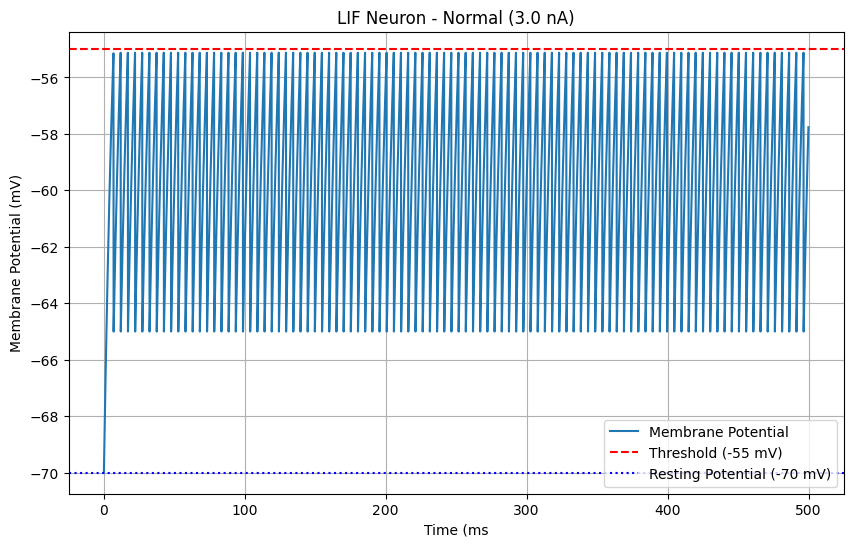

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# LIF model parameters
resting_potential = -70.0  # Resting potential in mV
threshold = -55.0  # Threshold potential in mV
reset_potential = -65.0  # Reset potential after a spike in mV
membrane_resistance = 10.0  # Membrane resistance in MOhm
membrane_time_constant = 10.0  # Membrane time constant in ms

def lif_model(input_current, dt=0.1, simulation_time=500):
    num_steps = int(simulation_time / dt)
    time = np.arange(0, simulation_time, dt)
    membrane_potential = np.full(num_steps, resting_potential)
    spikes = []
    
    for t in range(1, num_steps):
        dv = (
            (- (membrane_potential[t-1] - resting_potential) +
             membrane_resistance * input_current[t]) /
            membrane_time_constant
        ) * dt
        membrane_potential[t] = membrane_potential[t-1] + dv

        if membrane_potential[t] >= threshold:
            membrane_potential[t] = reset_potential
            spikes.append(t * dt)

    return time, membrane_potential, spikes

# Parameters
simulation_time = 500  # ms
dt = 0.1  # Time step in ms

# Scenario: Input Current of 3.0 nA
input_current_3 = np.full(int(simulation_time / dt), 3.0)  # Constant input of 3.0 nA

def run_simulation_and_plot(input_current, title):
    time, membrane_potential, spikes = lif_model(input_current, dt, simulation_time)

    plt.figure(figsize=(10, 6))
    plt.plot(time, membrane_potential, label="Membrane Potential")
    plt.axhline(threshold, color="r", linestyle="--", label="Threshold (-55 mV)")
    plt.axhline(resting_potential, color="b", linestyle=":", label="Resting Potential (-70 mV)")
    plt.xlabel("Time (ms")
    plt.ylabel("Membrane Potential (mV)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

run_simulation_and_plot(input_current_3, "LIF Neuron - Normal (3.0 nA)")